In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Original Data/flavors_of_cacao.csv")  # Replace with actual path
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [72]:
data = {
    'Company \n(Maker-if known)': ['A. Morin', 'A. Morin', 'A. Morin'],
    'Specific Bean Origin\nor Bar Name': ['Agua Grande', 'Kpime', 'Atsane'],
    'REF': [1876, 1676, 1676],
    'Review\nDate': [2016, 2015, 2015],
    'Cocoa\nPercent': ['63%', '70%', '70%'],
    'Company\nLocation': ['France', 'France', 'France'],
    'Rating': [3.75, 2.75, 3.00],
    'Bean\nType': ['', '', ''],
    'Broad Bean\nOrigin': ['Sao Tome', 'Togo', 'Togo']
}
df = pd.DataFrame(data)

# ===== COLUMN CLEANING =====
# 1. Remove newlines and extra spaces in column names
df.columns = [col.replace('\n', ' ').strip() for col in df.columns]

# 2. Rename columns for consistency
df.rename(columns={
    'Company  (Maker-if known)': 'Company',
    'Specific Bean Origin or Bar Name': 'BarName',
    'Review Date': 'ReviewDate',
    'Cocoa Percent': 'CocoaPercent',
    'Company Location': 'Location',
    'Bean Type': 'BeanType',
    'Broad Bean Origin': 'BroadOrigin'
}, inplace=True)

# 3. Convert CocoaPercent from string (e.g., "70%") to float (e.g., 0.70)
df['CocoaPercent'] = df['CocoaPercent'].str.rstrip('%').astype(float) / 100

# 4.Convert ReviewDate to datetime if needed
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'], format='%Y')  # Converts year to datetime

# 5. Display cleaned DataFrame
print(df.head())
print("\nCleaned Columns:", df.columns.tolist())

    Company      BarName   REF ReviewDate  CocoaPercent Location  Rating  \
0  A. Morin  Agua Grande  1876 2016-01-01          0.63   France    3.75   
1  A. Morin        Kpime  1676 2015-01-01          0.70   France    2.75   
2  A. Morin       Atsane  1676 2015-01-01          0.70   France    3.00   

  BeanType BroadOrigin  
0             Sao Tome  
1                 Togo  
2                 Togo  

Cleaned Columns: ['Company', 'BarName', 'REF', 'ReviewDate', 'CocoaPercent', 'Location', 'Rating', 'BeanType', 'BroadOrigin']


In [54]:
# Check for missing values
df.isnull().sum()

numeric_column    0
dtype: int64

In [74]:
# Missing Values
# Fill blank or NaN BeanType entries with 'Unknown'
df['BeanType'] = df['BeanType'].fillna('').replace('', 'Unknown')
# Count any missing BroadOrigin entries
print("Missing BroadOrigin:", df['BroadOrigin'].isna().sum())

Missing BroadOrigin: 0


In [56]:
# Rename columns for easier access
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [17]:
# If 'ref' or other metadata is unnecessary
df = df.drop(columns=['ref'])  # adjust as needed

In [19]:
print(df.columns.tolist())

['company\xa0\n(maker-if_known)', 'specific_bean_origin\nor_bar_name', 'review\ndate', 'cocoa\npercent', 'company\nlocation', 'rating', 'bean\ntype', 'broad_bean\norigin']


In [28]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Remove duplicates if necessary
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [34]:
# Example: Create a sample DataFrame
df = pd.DataFrame({
    'numeric_column': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})

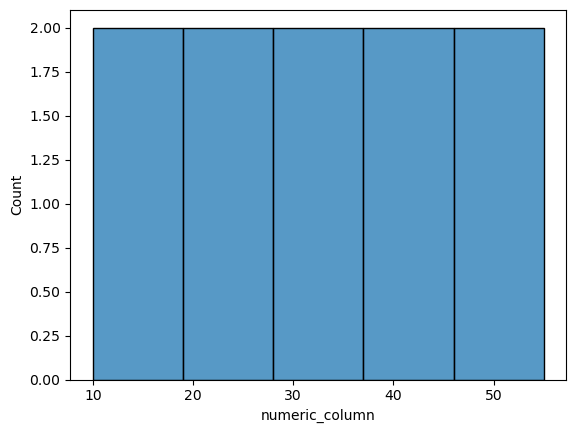

count    10.000000
mean     32.500000
std      15.138252
min      10.000000
25%      21.250000
50%      32.500000
75%      43.750000
max      55.000000
Name: numeric_column, dtype: float64


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(df['numeric_column'])
plt.show()

# Summary statistics
print(df['numeric_column'].describe())

In [76]:
# Defining output path
cleaned_data = r"/Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Prepared Data/flavors_of_cacao_cleaned.csv"

# Writing out the cleaned DataFrame
df.to_csv(cleaned_data, index=False)

print(f"Cleaned data saved to: {cleaned_data}")

Cleaned data saved to: /Users/wehadiwood/Desktop/Advanced Analytics and Dashboard Design/02 Data/Prepared Data/flavors_of_cacao_cleaned.csv
